In [11]:
import pandas as pd
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',None)
import warnings

In [20]:
ent = pd.read_csv('data/turnstile/entries.csv')
ext = pd.read_csv('data/turnstile/exits.csv')

In [21]:
stations = ['103 st (1)', '103 st (6)', '103 st-corona plza (7)',
             '110 st (6)', '111 st (7)', '116 st (2/3)', '116 st (6)',
             '116 st-columbia (1)', '125 st (2/3)', '125 st (4/5/6)', '135 st (2/3)', '137 st-city clg (1)',
             '138 st-grand concourse (4/5)', '14 st-7 av (1/2/3/F/L/M)', '14 st-union sq (4/5/6/L/N/Q/R/W)', '145 st (1)',
             '145 st (3)', '149 st-grand concourse (2/4/5)', '157 st (1)', '161 st-yankee stdm (4/B/D)', '167 st (4)',
             '168 st-broadway (1/A/C)', '170 st (4)', '174 st (2/5)', '176 st (6)', '18 st (1)', '181 st (1)', '183 st (4)',
             '191 st (1)', '207 st (1)', '215 st (1)', '219 st (2/5)', '225 st (2/5)', '23 st (1)', '23 st (6)',
             '231 st (1)', '233 st (2/5)', '238 st (1)', '28 st (1)', '28 st (6)', '3 av-138 st (6)', '3 av-149 st (2/5)',
             '33 st (6)', '33 st-rawson st (7)', '34 st-hudson yd (7)', '34 st-penn sta (1/2/3/A/C/E)', '40 st-lowery st (7)',
             '42 st bryant pk-5 av (7/B/D/F/M)', '46 st-bliss st (7)', '50 st (1)', '52 st-lincoln (7)',
             'lexington av-59 st (4/5/6/N/Q/R/W)','59 st-columbus cr (1/A/B/C/D)',
             '61 st-woodside (7)', '66 st-lincoln ctr (1)', '68 st-hunter clg (6)',
             '69 st-fisk av (7)', '72 st (1/2/3)', '77 st (6)', '79 st (1)',
             '82 st-jackson hts (7)', '86 st (1)', '86 st (4/5/6)', '90 st-elmhurst (7)', '96 st (1/2/3)', '96 st (6)',
             'allerton av (2/5)', 'astor pl (6)', 'atlantic av-barclays ctr (2/3/4/5/B/D/N/Q/R)', 'baychester av (5)',
             'bedford pk blvd (4)', 'bergen st (2/3)', 'beverly rd (2/5)', 'borough hall-court st (2/3/4/5/R)',
             'bowling green (4/5)', 'broadway-lafayette/bleecker st (6/B/D/F/Q)',  'bronx pk east (2/5)', 'brook av (6)',
             'brooklyn bridge-city hall (4/5/6/J/Z)', 'buhre av (6)', 'burke av (2/5)', 'burnside av (4)','canal st (1)',
             'canal st (6/J/N/Q/R/W/Z)', 'castle hill av (6)', 'cathedral pkwy-110 st (1)','chambers st-wtc (1/2/3/A/C/E/R/W)',
             'christopher st (1)', 'church av (2/5)', 'clark st (2/3)', 'court sq (7)', 'crown hts-utica av (3/4)',
             'ctl park n-110 st (2/3)', 'cypress av (6)', 'dyckman st (1)', 'e 143 st (6)', 'e 149 st (6)', 'e 180 st (2/5)',
             'eastchester dyre av (5)', 'eastern pkwy (2/3)', 'elder av (6)',  'flatbush av-bk clg (2/5)', 'flushing-main st (7)',
             'fordham rd (4)', 'franklin av (2/3/4/5/S)', 'franklin st (1)', 'freeman st (2/5)', 'fulton st (2/3/4/5/A/C/J/Z)',
             'grand army plza (2/3)', 'grand ctl-42 st (4/5/6/7)', 'gun hill rd (2/5)', 'gun hill rd (5)', 'harlem-148 st (3)',
             'houston st (1)', 'hoyt st (2/3)', 'hunters pt (7)', 'hunts pt av (6)', 'intervale av (2/5)', 'jackson av (2/5)',
             'jackson hts-roosevelt av (7/E/F/M/R)', 'junction blvd (7)', 'junius st (3)',
             'kingsbridge rd (4)', 'kingston av (4)', 'lexington av-53 st (6/E/M)',
             'longwood av (6)',  'marble hill-225 st (1)', 'mets-willets pt (7)', 'middletown rd (6)', 'morris pk (5)',
             'morrison av (6)', 'moshulu pkwy (4)', 'mt eden av (4)', 'nereid av (2/5)', 'nevins st (2/3/4/5)','new lots av (3)',
             'newkirk av (2/5)', 'nostrand av (3)', 'park pl (2/3/A/C/E)', 'parkchester (6)', 'pelham bay pk (6)',
             'pelham pkwy (2/5)', 'pelham pkwy (5)', 'pennsylvania av (3)',  'president st (2/5)', 'prospect av (2/5)',
             'queensboro plza (7/N/Q/W)','rector st (1)', 'rockaway av (3)','saratoga av (3)', 'simpson st (2/5)',
             'south ferry (1/R/W)', 'spring st (6)', 'st lawrence av (6)', 'sterling st (2/5)','sutter av (3)',
             'times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S)', 'van cortlandt park-242 st (1)', 'van siclen av (3)', 'vernon-jackson (7)',
             'wakefield-241 st (2)', 'wall st (2/3)', 'wall st (4/5)', 'west farm sq-e tremont (2/5)', 'westchester sq (6)',
              'whitlock av (6)', 'winthrop st (2/5)', 'woodlawn (4)', 'zerega av (6)']

In [22]:
stations_bx = ['van cortlandt park-242 st (1)','238 st (1)','231 st (1)','wakefield-241 st (2)','nereid av (2/5)',
              '233 st (2/5)','225 st (2/5)','219 st (2/5)','gun hill rd (2/5)','burke av (2/5)','allerton av (2/5)',
              'pelham pkwy (2/5)','bronx pk east (2/5)','e 180 st (2/5)','west farm sq-e tremont (2/5)','174 st (2/5)',
              'freeman st (2/5)','simpson st (2/5)','intervale av (2/5)','prospect av (2/5)','jackson av (2/5)',
              '3 av-149 st (2/5)','149 st-grand concourse (2/4/5)','woodlawn (4)','mosholu pkwy (4)','bedford pk blvd (4)',
              'kingsbridge rd (4)','fordham rd (4)','183 st (4)','burnside av (4)','176 st (4)','mt eden av (4)',
              '170 st (4)','167 st (4)','161 st-yankee stdm (4/B/D)','eastchester dyre av (5)','baychester av (5)',
              'gun hill rd (5)','pellham pkwy (5)','morris pk (5)','pelham bay pk (6)','buhre av (6)','middletown rd (6)',
              'westchester sq (6)','zerega av (6)','castle hill av (6)','parkchester (6)','st lawrence av (6)',
              'morrison av (6)','elder av (6)','whitlock av (6)','hunts pt av (6)','longwood av (6)','e 149 st (6)',
              'e 143 st (6)','cypress av (6)','brook av (6)','3 av-138 st (6)']

stations_bk = ['clark st (2/3)','borough hall-court st (2/3/4/5/R)','hoyt st (2/3)','nevins st (2/3/4/5)',
              'atlantic av-barclays ctr (2/3/4/5/B/D/N/Q/R)','bergen st (2/3)','grand army plza (2/3)','eastern pkwy (2/3)',
               'franklin av (2/3/4/5/S)','president st (2/5)','sterling st (2/5)','winthrop st (2/5)','church av (2/5)',
               'beverly rd (2/5)','newkirk av (2/5)','flatbush av-bk clg (2/5)','nostrand av (3)','kingston av (3)',
              'crown hts-utica av (3/4)','sutter av (3)','saratoga av (3)','rockaway av (3)','junius st (3)',
              'pennsylvania av (3)','van siclen av (3)','new lots av (3)']

stations_manh = ['marble hill-225 st (1)','215 st (1)','207 st (1)','dyckman st (1)','191 st (1)','181 st (1)',
                '168 st-broadway (1/A/C)','157 st (1)','145 st (1)','137 st-city clg (1)','125 st (1)','116 st-columbia (1)',
                'cathedral pkwy-110 st (1)','103 st (1)','96 st (1/2/3)','86 st (1)','79 st (1)','72 st (1/2/3)',
                '66 st-lincoln ctr (1)','59 st-columbus cr (1/A/B/C/D)','50 st (1)','times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S)',
                 '42 st bryant pk-5 av (7/B/D/F/M)','34 st-penn sta (1/2/3/A/C/E)','28 st (1)',
                 '23 st (1)','18 st (1)','14 st-7 av (1/2/3/F/L/M)','canal st (6/J/N/Q/R/W/Z)',
                 'christopher st (1)','houston st (1)','canal st (1)','franklin st (1)','chambers st-wtc (1/2/3/A/C/E/R/W)',
                 'rector st (1)','south ferry (1/R/W)','135 st (2/3)','125 st (1)','116 st (2/3)',
                'ctl park n-110 st (2/3)','park pl (2/3/A/C/E)','fulton st (2/3/4/5/A/C/J/Z)','wall st (2/3)',
                'harlem-148 st (3)','145 st (3)','125 st (4/5/6)','86 st (4/5/6)','lexington av-59 st (4/5/6/N/Q/R/W)',
                'grand ctl-42 st (4/5/6/7)','14 st-union sq (4/5/6/L/N/Q/R/W)','brooklyn bridge-city hall (4/5/6/J/Z)',
                'wall st (4/5)','bowling green (4/5)','116 st (6)','110 st (6)','103 st (6)','96 st (6)','77 st (6)',
                '68 st-hunter clg (6)','lexington av-53 st (6/E/M)','33 st (6)','28 st (6)','astor pl (6)',
                 'broadway-lafayette/bleecker st (6/B/D/F/Q)', '34 st-hudson yd (7)']

stations_qns = ['flushing-main st (7)','mets-willets pt (7)','111 st (7)','103 st-corona plza (7)','junction blvd (7)',
               '90 st-elmhurst (7)', '82 st-jackson hts (7)','69 st-fisk av (7)','jackson hts-roosevelt av (7/E/F/M/R)'
               '61 st-woodside (7)','52 st-lincoln (7)','46 st-bliss st (7)','40 st-lowery st (7)','33 st-rawson st (7)',
               'queensboro plza (7/N/Q/W)','court sq (7)','hunters pt (7)','vernon-jackson (7)']

In [23]:
stations_outside = ['van cortlandt park-242 st (1)','238 st (1)','231 st (1)','marble hill-225 st (1)',
                   '215 st (1)','207 st (1)','dyckman st (1)','wakefield-241 st (2)','nereid av (2/5)',
                   '233 st (2/5)','225 st (2/5)','219 st (2/5)','gun hill rd (2/5)','burke av (2/5)','allerton av (2/5)',
                   'pelham pkwy (2/5)','bronx pk east (2/5)','e 180 st (2/5)','west farm sq-e tremont (2/5)','174 st (2/5)',
                   'freeman st (2/5)','simpson st (2/5)','intervale av (2/5)','prospect av (2/5)','jackson av (2/5)',
                   'sutter av (3)','saratoga av (3)','rockaway av (3)','junius st (3)','pennsylvania av (3)',
                   'van siclen av (3)','new lots av (3)','woodlawn (4)','mosholu pkwy (4)','bedford pk blvd (4)',
                   'kingsbridge rd (4)','fordham rd (4)','183 st (4)','burnside av (4)','176 st (4)','mt eden av (4)',
                   '170 st (4)','167 st (4)','161 st-yankee stdm (4/B/D)','eastchester dyre av (5)','baychester av (5)',
                   'gun hill rd (5)','pellham pkwy (5)','morris pk (5)','pelham bay pk (6)','buhre av (6)','middletown rd (6)',
                   'westchester sq (6)','zerega av (6)','castle hill av (6)','parkchester (6)','st lawrence av (6)',
                   'morrison av (6)','elder av (6)','whitlock av (6)','mets-willets pt (7)','111 st (7)',
                   '103 st-corona plza (7)','90 st-elmhurst (7)', '82 st-jackson hts (7)','69 st-fisk av (7)',
                   '61 st-woodside (7)','52 st-lincoln (7)','46 st-bliss st (7)','40 st-lowery st (7)','33 st-rawson st (7)',
                   'queensboro plza (7/N/Q/W)','court sq (7)']

stations_express = ['96 st (1/2/3)','72 st (1/2/3)','times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S)','34 st-penn sta (1/2/3/A/C/E)',
                   '14 st-7 av (1/2/3/F/L/M)','chambers st-wtc (1/2/3/A/C/E/R/W)','3 av-149 st (2/5)','149 st-grand concourse (2/4/5)',
                   'borough hall-court st (2/3/4/5/R)','atlantic av-barclays ctr (2/3/4/5/B/D/N/Q/R)',
                   'franklin av (2/3/4/5/S)','crown hts-utica av (3/4)','125 st (4/5/6)','86 st (4/5/6)',
                    'lexington av-59 st (4/5/6/N/Q/R/W)','grand ctl-42 st (4/5/6/7)',
                    '14 st-union sq (4/5/6/L/N/Q/R/W)','brooklyn bridge-city hall (4/5/6/J/Z)',
                   'fulton st (2/3/4/5/A/C/J/Z)','wall st (4/5)','bowling green (4/5)','parkchester (6)','hunts pt av (6)',
                   '3 av-138 st (6)','flushing-main st (7)','mets-willets pt (7)','junction blvd (7)','61 st-woodside (7)',
                   'queensboro plza (7/N/Q/W)','court sq (7)','hunters pt (7)','vernon-jackson (7)',]

stations_ada = ['231 st (1)','dyckman st (1)','96 st (1/2/3)','66 st-lincoln ctr (1)','59 st-columbus cr (1/A/B/C/D)',
               'times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S)','34 st-penn sta (1/2/3/A/C/E)','chambers st-wtc (1/2/3/A/C/E/R/W)',
               'south ferry (1/R/W)','233 st (2/5)','gun hill rd (2/5)','e 180 st (2/5)',
               'simpson st (2/5)','3 av-149 st (2/5)','135 st (2/3)','fulton st (2/3/4/5/A/C/J/Z)',
               'borough hall-court st (2/3/4/5/R)','atlantic av-barclays ctr (2/3/4/5/B/D/N/Q/R)','eastern pkwy (2/3)',
               'church av (2/5)','flatbush av-bk clg (2/5)','crown hts-utica av (3/4)','fordham rd (4)',
               '161 st-yankee stdm (4/B/D)','125 st (4/5/6)','86 st (4/5/6)','grand ctl-42 st (4/5/6/7)',
               'brooklyn bridge-city hall (4/5/6/J/Z)','bowling green (4/5)','gun hill rd (5)','pelham bay pk (6)',
               'hunts pt av (6)','28 st (6)','broadway-lafayette/bleecker st (6/B/D/F/Q)','canal st (6/J/N/Q/R)',
               'flushing-main st (7)','mets-willets pt (7)','junction blvd (7)','jackson hts-roosevelt av (7/E/F/M/R)',
               '69 st-fisk av (7)','61 st-woodside (7)','court sq (7)','lexington av-53 st (6/E/M)']

stations_terminal = ['van cortlandt park-242 st (1)','south ferry (1/R/W)','wakefield-241 st (2)','flatbush av-bk clg (2/5)',
                    'harlem-148 st (3)','new lots av (3)','woodlawn (4)','crown hts-utica av (3/4)','eastchester dyre av (5)',
                    'pelham bay pk (6)','brooklyn bridge-city hall (4/5/6/J/Z)','flushing-main st (7)',]

In [24]:
ent['date'] = pd.to_datetime(ent['date'])
ent.set_index('date',inplace=True)

ext['date'] = pd.to_datetime(ext['date'])
ext.set_index('date',inplace=True)

In [25]:
ts_down = pd.to_datetime('2015-01-01')
ts_up = pd.to_datetime('2020-01-01')
stamp = pd.date_range(start=ts_down,end=ts_up)

ent = ent.loc[(ent.index >= stamp[0]) & (ent.index < stamp[-1])]
ext = ext.loc[(ext.index >= stamp[0]) & (ext.index < stamp[-1])]

In [28]:
manh_ent = ent[stations_manh]
manh_medians = manh_ent.median(axis=0).sort_values(ascending=False)
manh_ent['manh median'] = manh_ent.median(axis=1)
manh_top_5_ent = list(manh_medians[:5].index)
manh_5_ent = manh_ent[manh_top_5_ent]
manh_5_ent = manh_5_ent.join(manh_ent['manh median'])
warnings.filterwarnings('ignore')

In [27]:
manh_ext = ext[stations_manh]
manh_medians = manh_ext.median(axis=0).sort_values(ascending=False)
manh_ext['manh median'] = manh_ext.median(axis=1)
manh_top_5_ext = list(manh_medians[:5].index)
manh_5_ext = manh_ent[manh_top_5_ext]
manh_5_ext = manh_5_ext.join(manh_ext['manh median'])
warnings.filterwarnings('ignore')

In [30]:
manh_ext

,marble hill-225 st (1),215 st (1),207 st (1),dyckman st (1),191 st (1),181 st (1),168 st-broadway (1/A/C),157 st (1),145 st (1),137 st-city clg (1),125 st (1),116 st-columbia (1),cathedral pkwy-110 st (1),103 st (1),96 st (1/2/3),86 st (1),79 st (1),72 st (1/2/3),66 st-lincoln ctr (1),59 st-columbus cr (1/A/B/C/D),50 st (1),times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S),42 st bryant pk-5 av (7/B/D/F/M),34 st-penn sta (1/2/3/A/C/E),28 st (1),23 st (1),18 st (1),14 st-7 av (1/2/3/F/L/M),canal st (6/J/N/Q/R/W/Z),christopher st (1),houston st (1),canal st (1),franklin st (1),chambers st-wtc (1/2/3/A/C/E/R/W),rector st (1),south ferry (1/R/W),135 st (2/3),125 st (1),116 st (2/3),ctl park n-110 st (2/3),park pl (2/3/A/C/E),fulton st (2/3/4/5/A/C/J/Z),wall st (2/3),harlem-148 st (3),145 st (3),125 st (4/5/6),86 st (4/5/6),lexington av-59 st (4/5/6/N/Q/R/W),grand ctl-42 st (4/5/6/7),14 st-union sq (4/5/6/L/N/Q/R/W),brooklyn bridge-city hall (4/5/6/J/Z),wall st (4/5),bowling green (4/5),116 st (6),110 st (6),103 st (6),96 st (6),77 st (6),68 st-hunter clg (6),lexington av-53 st (6/E/M),33 st (6),28 st (6),astor pl (6),broadway-lafayette/bleecker st (6/B/D/F/Q),34 st-hudson yd (7),manh median
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,126951335,32138871033,1078223916,1406212970,3.102023e+09,6.784008e+09,10064100229,3526974971,2.590562e+10,1.700000e+11,2838286806,3717952396,3341326019,5782550605,2.620000e+11,19028899082,6.289186e+09,6.410000e+11,13969013404,3.340000e+11,14913061385,9.600000e+11,3.550000e+11,3.512725e+10,69104346767,7748481327,2.173499e+09,3.080000e+11,1.060000e+11,1.450000e+11,9542585989,2664423943,2407900117,4.610000e+11,10099220468,6409261403,2.891256e+09,2838286806,2325770170,4.715541e+09,4383649649,4.430000e+11,19251067080,956917285,102192880.0,1.630000e+11,4.120000e+11,3.289588e+10,1.450000e+11,8.472553e+10,5.630000e+11,7.543669e+09,3.160000e+11,7004193185,5230230526,7.608434e+09,5455408813,41103620443,22192422753,4.829047e+10,1.169069e+10,3.740000e+11,4945595858,1.691903e+10,NaN,1.089495e+10
2015-02-01,116107035,28571670802,960385987,1264853756,2.771423e+09,5.003019e+09,8930434371,3240873175,8.360025e+10,1.540000e+11,2539393869,3390597019,3101899128,5363644273,2.320000e+11,17157112206,5.663242e+09,5.770000e+11,20103818506,5.200000e+11,13379994437,8.470000e+11,3.220000e+11,3.139342e+10,64656403060,7015824312,1.947701e+09,2.740000e+11,1.690000e+11,1.250000e+11,8664082060,2447828753,2175592107,3.830000e+11,9008248339,5810083128,2.594010e+09,2539393869,2142771403,4.271060e+09,3878929057,4.250000e+11,17065421855,875312917,88688460.0,1.470000e+11,3.480000e+11,2.938743e+10,1.280000e+11,8.763992e+10,4.910000e+11,1.868597e+10,2.730000e+11,6064795182,4698732830,6.943062e+09,4850646389,36882693256,16766790632,1.460000e+11,1.804622e+10,3.410000e+11,4432798989,1.483213e+10,NaN,1.410606e+10
2015-03-01,135664849,31806902979,1067311976,1416886026,3.071912e+09,5.578591e+09,10054070971,3586469425,3.670000e+11,1.720000e+11,2864431471,3766321419,3389304673,5813592453,2.580000e+11,19048022651,6.540778e+09,6.320000e+11,26770891002,7.980000e+11,14762892159,1.750000e+12,3.310000e+11,3.623704e+10,66526715398,7881867755,2.181875e+09,3.080000e+11,2.140000e+11,1.390000e+11,9672352590,2720627538,2423967618,4.150000e+11,10002231412,6538731188,2.840052e+09,2864431471,2348500797,4.715118e+09,4186504156,4.660000e+11,18780649953,975432672,98082522.0,1.630000e+11,3.810000e+11,3.269683e+10,1.420000e+11,9.232650e+10,5.420000e+11,5.028405e+10,2.990000e+11,6832600467,5263159713,7.669340e+09,5287702315,41160804672,18930828030,4.050000e+11,2.420825e+10,3.620000e+11,4812291359,1.641287e+10,NaN,1.558788e+10
2015-04-01,142220592,30449670987,1082372141,1388121435,3.040005e+09,5.488150e+09,10059099807,3514454583,3.590000e+11,1.640000e+11,2826687927,3655837097,3320424805,5625482445,2.500000e+11,18640589908,6.055117e+09,6.130000e+11,27128733158,7.950000e+11,14211545793,1.770000e+12,3.090000e+11,3.624667e+10,22850241726,7669348265,

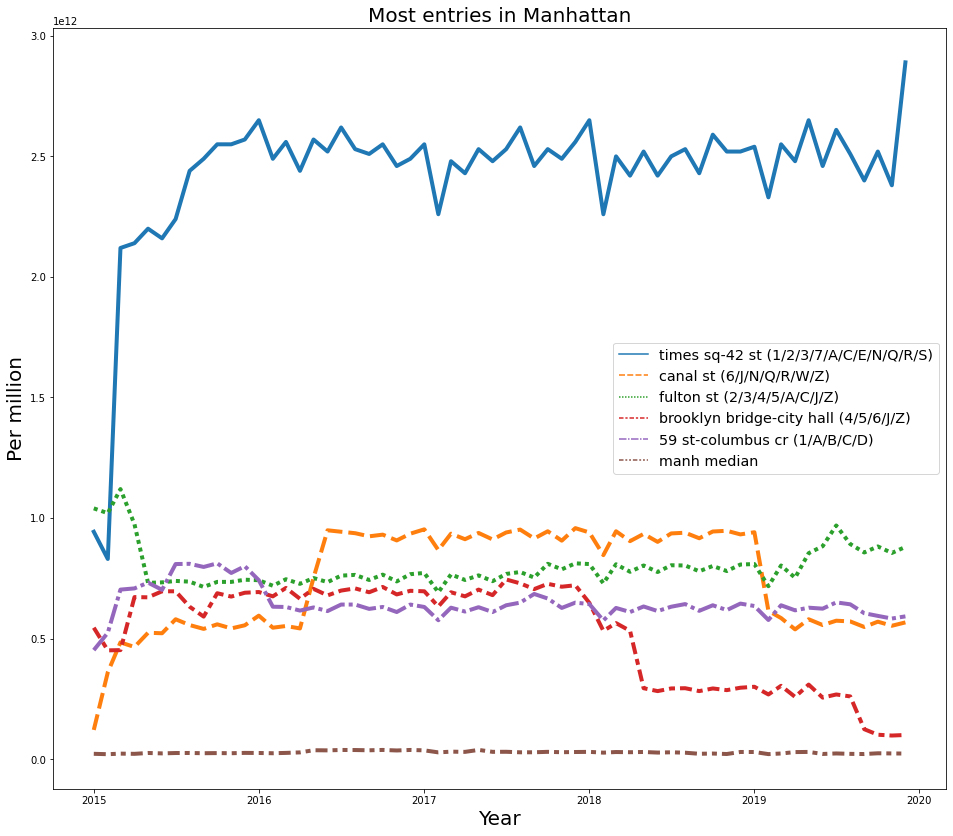

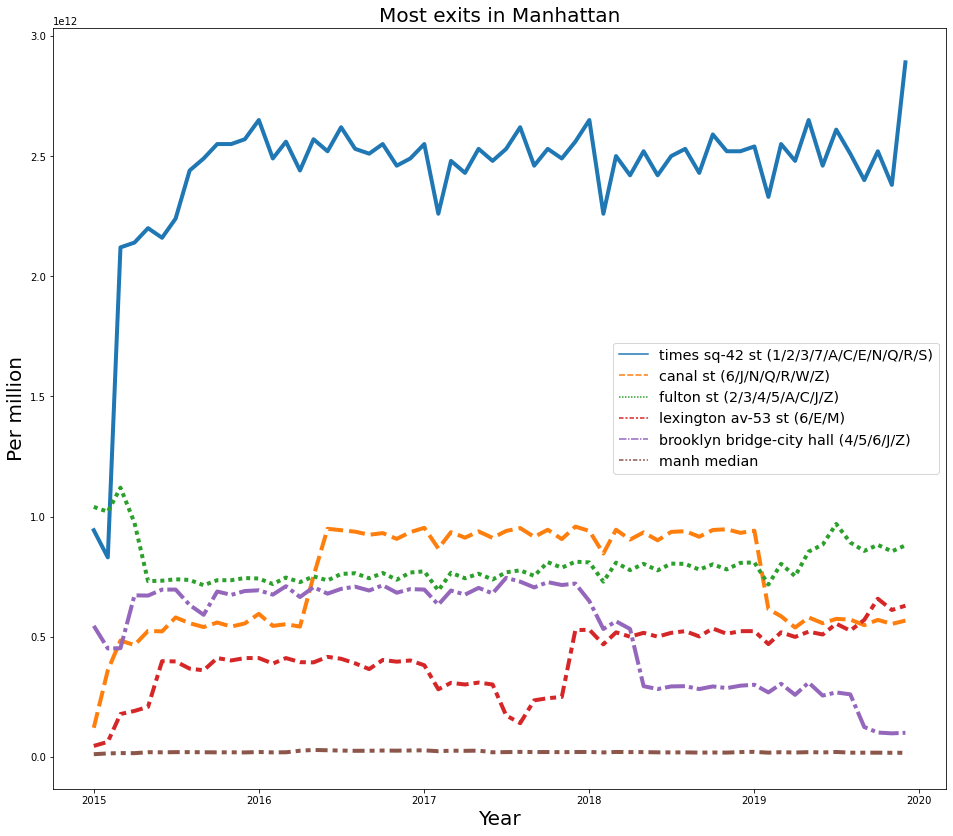

In [29]:
fig, ax = plt.subplots(figsize=(16,14))
sns.lineplot(data=manh_5_ent, linewidth=4)
ax.legend(fontsize='x-large')
ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('Per million',fontsize=20)
ax.set_title('Most entries in Manhattan',fontsize=20)
plt.show()

fig, ax = plt.subplots(figsize=(16,14))
sns.lineplot(data=manh_5_ext,linewidth=4)
ax.legend(fontsize='x-large')
ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('Per million',fontsize=20)
ax.set_title('Most exits in Manhattan',fontsize=20)
plt.show();

In [40]:
manh_ent.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [44]:
import numpy as np

In [47]:
manh_ent.fillna(value=0,inplace=True)

In [56]:
manh_ent

,marble hill-225 st (1),215 st (1),207 st (1),dyckman st (1),191 st (1),181 st (1),168 st-broadway (1/A/C),157 st (1),145 st (1),137 st-city clg (1),125 st (1),116 st-columbia (1),cathedral pkwy-110 st (1),103 st (1),96 st (1/2/3),86 st (1),79 st (1),72 st (1/2/3),66 st-lincoln ctr (1),59 st-columbus cr (1/A/B/C/D),50 st (1),times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S),42 st bryant pk-5 av (7/B/D/F/M),34 st-penn sta (1/2/3/A/C/E),28 st (1),23 st (1),18 st (1),14 st-7 av (1/2/3/F/L/M),canal st (6/J/N/Q/R/W/Z),christopher st (1),houston st (1),canal st (1),franklin st (1),chambers st-wtc (1/2/3/A/C/E/R/W),rector st (1),south ferry (1/R/W),135 st (2/3),125 st (1),116 st (2/3),ctl park n-110 st (2/3),park pl (2/3/A/C/E),fulton st (2/3/4/5/A/C/J/Z),wall st (2/3),harlem-148 st (3),145 st (3),125 st (4/5/6),86 st (4/5/6),lexington av-59 st (4/5/6/N/Q/R/W),grand ctl-42 st (4/5/6/7),14 st-union sq (4/5/6/L/N/Q/R/W),brooklyn bridge-city hall (4/5/6/J/Z),wall st (4/5),bowling green (4/5),116 st (6),110 st (6),103 st (6),96 st (6),77 st (6),68 st-hunter clg (6),lexington av-53 st (6/E/M),33 st (6),28 st (6),astor pl (6),broadway-lafayette/bleecker st (6/B/D/F/Q),34 st-hudson yd (7),manh median
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,1051785016,1547875104,28938287789,1084224587,3.152789e+09,5.367341e+09,24181189555,5256700303,1.080000e+11,1.220000e+11,2.533963e+09,9.806005e+09,7639528011,11192517435,1.280000e+11,16660387436,1.149756e+10,4.800000e+11,5.302887e+10,4.520000e+11,14112265168,9.430000e+11,4.600000e+11,7.433713e+10,4902721513,5957603707,3688017995,2.820000e+11,1.210000e+11,3.780000e+11,25806002827,2881666925,3723229008,5.620000e+11,24877421947,18337742143,6.414956e+09,2.533963e+09,4740671398,1.198646e+10,17271669437,1.040000e+12,21617968789,1426337685,1.953240e+09,3.830000e+11,2.210000e+11,3.727493e+10,5.430000e+11,2.040000e+11,5.450000e+11,6.934906e+10,2.040000e+11,9405032957,5718744163,6.469823e+09,1.670638e+10,2.630000e+11,26226537734,4.543142e+10,2.220179e+10,2.870000e+11,8984768938,2.425618e+10,0.000000e+00,2.190988e+10
2015-02-01,940891218,1387436981,25480805362,994395729,2.813712e+09,4.248678e+09,21515074154,4803287171,1.220000e+11,1.100000e+11,2.269467e+09,8.928571e+09,7236162575,10400060066,1.130000e+11,14800041837,1.036138e+10,4.320000e+11,6.234351e+10,5.240000e+11,12642549910,8.300000e+11,4.160000e+11,6.613864e+10,4554384458,5437916201,3310166507,2.510000e+11,3.600000e+11,3.240000e+11,23811742912,2629788822,3382301207,4.530000e+11,22417456230,21948272362,5.810962e+09,2.269467e+09,4311080905,1.081196e+10,15248712086,1.020000e+12,19153473322,1299044406,1.697246e+09,3.440000e+11,1.920000e+11,3.321486e+10,4.890000e+11,2.340000e+11,4.510000e+11,6.101788e+10,1.840000e+11,8230033631,5114115083,5.945116e+09,1.490139e+10,2.380000e+11,19845516617,6.219664e+10,3.119347e+10,2.620000e+11,7893509371,2.066459e+10,0.000000e+00,2.025506e+10
2015-03-01,1074770572,1554512438,27938867722,1136398527,3.114533e+09,4.750628e+09,24099185329,5343463985,2.520000e+11,1.230000e+11,2.564659e+09,9.895536e+09,7760158578,11265070192,1.260000e+11,16538020920,1.288775e+10,4.730000e+11,7.834727e+10,7.030000e+11,13936404097,2.120000e+12,4.310000e+11,7.344811e+10,5104060265,6134094493,3706317374,2.820000e+11,4.840000e+11,3.610000e+11,26350295361,2949066502,3771078698,4.900000e+11,24568555892,29614580219,6.407815e+09,2.564659e+09,4760207958,1.188199e+10,16418129784,1.120000e+12,21085974037,1441047440,1.875195e+09,3.810000e+11,2.080000e+11,3.691634e+10,5.410000e+11,2.420000e+11,4.520000e+11,6.549755e+10,2.020000e+11,9364868249,5686061411,6.604278e+09,1.625874e+10,2.630000e+11,22445121390,1.780000e+11,4.089552e+10,2.750000e+11,8675490873,2.284429e+10,0.000000e+00,2.264471e+10
2015-04-01,1101889536,1496537968,27973871170,1135151790,3.080718e+09,4.681562e+09,23674516657,5243322285,2.460000e+11,1.180000e+11,2.534694e+09,9.588770e+09,7609381551,10906855088,1.210000e+11,16212405589,1.101147e+10,4.590000e+11,5.861200e+10,7.080000

In [122]:
manh_ent.loc['mean'] = manh_ent.mean()
manh_ent

,marble hill-225 st (1),215 st (1),207 st (1),dyckman st (1),191 st (1),181 st (1),168 st-broadway (1/A/C),157 st (1),145 st (1),137 st-city clg (1),125 st (1),116 st-columbia (1),cathedral pkwy-110 st (1),103 st (1),96 st (1/2/3),86 st (1),79 st (1),72 st (1/2/3),66 st-lincoln ctr (1),59 st-columbus cr (1/A/B/C/D),50 st (1),times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S),42 st bryant pk-5 av (7/B/D/F/M),34 st-penn sta (1/2/3/A/C/E),28 st (1),23 st (1),18 st (1),14 st-7 av (1/2/3/F/L/M),canal st (6/J/N/Q/R/W/Z),christopher st (1),houston st (1),canal st (1),franklin st (1),chambers st-wtc (1/2/3/A/C/E/R/W),rector st (1),south ferry (1/R/W),135 st (2/3),125 st (1),116 st (2/3),ctl park n-110 st (2/3),park pl (2/3/A/C/E),fulton st (2/3/4/5/A/C/J/Z),wall st (2/3),harlem-148 st (3),145 st (3),125 st (4/5/6),86 st (4/5/6),lexington av-59 st (4/5/6/N/Q/R/W),grand ctl-42 st (4/5/6/7),14 st-union sq (4/5/6/L/N/Q/R/W),brooklyn bridge-city hall (4/5/6/J/Z),wall st (4/5),bowling green (4/5),116 st (6),110 st (6),103 st (6),96 st (6),77 st (6),68 st-hunter clg (6),lexington av-53 st (6/E/M),33 st (6),28 st (6),astor pl (6),broadway-lafayette/bleecker st (6/B/D/F/Q),34 st-hudson yd (7),manh median
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,1.051785e+09,1.547875e+09,2.893829e+10,1.084225e+09,3.152789e+09,5.367341e+09,2.418119e+10,5.256700e+09,1.080000e+11,1.220000e+11,2.533963e+09,9.806005e+09,7.639528e+09,1.119252e+10,1.280000e+11,1.666039e+10,1.149756e+10,4.800000e+11,5.302887e+10,4.520000e+11,1.411227e+10,9.430000e+11,4.600000e+11,7.433713e+10,4.902722e+09,5.957604e+09,3.688018e+09,2.820000e+11,1.210000e+11,3.780000e+11,2.580600e+10,2.881667e+09,3.723229e+09,5.620000e+11,2.487742e+10,1.833774e+10,6.414956e+09,2.533963e+09,4.740671e+09,1.198646e+10,1.727167e+10,1.040000e+12,2.161797e+10,1.426338e+09,1.953240e+09,3.830000e+11,2.210000e+11,3.727493e+10,5.430000e+11,2.040000e+11,5.450000e+11,6.934906e+10,2.040000e+11,9.405033e+09,5.718744e+09,6.469823e+09,1.670638e+10,2.630000e+11,2.622654e+10,4.543142e+10,2.220179e+10,2.870000e+11,8.984769e+09,2.425618e+10,0.000000e+00,2.190988e+10
2015-02-01 00:00:00,9.408912e+08,1.387437e+09,2.548081e+10,9.943957e+08,2.813712e+09,4.248678e+09,2.151507e+10,4.803287e+09,1.220000e+11,1.100000e+11,2.269467e+09,8.928571e+09,7.236163e+09,1.040006e+10,1.130000e+11,1.480004e+10,1.036138e+10,4.320000e+11,6.234351e+10,5.240000e+11,1.264255e+10,8.300000e+11,4.160000e+11,6.613864e+10,4.554384e+09,5.437916e+09,3.310167e+09,2.510000e+11,3.600000e+11,3.240000e+11,2.381174e+10,2.629789e+09,3.382301e+09,4.530000e+11,2.241746e+10,2.194827e+10,5.810962e+09,2.269467e+09,4.311081e+09,1.081196e+10,1.524871e+10,1.020000e+12,1.915347e+10,1.299044e+09,1.697246e+09,3.440000e+11,1.920000e+11,3.321486e+10,4.890000e+11,2.340000e+11,4.510000e+11,6.101788e+10,1.840000e+11,8.230034e+09,5.114115e+09,5.945116e+09,1.490139e+10,2.380000e+11,1.984552e+10,6.219664e+10,3.119347e+10,2.620000e+11,7.893509e+09,2.066459e+10,0.000000e+00,2.025506e+10
2015-03-01 00:00:00,1.074771e+09,1.554512e+09,2.793887e+10,1.136399e+09,3.114533e+09,4.750628e+09,2.409919e+10,5.343464e+09,2.520000e+11,1.230000e+11,2.564659e+09,9.895536e+09,7.760159e+09,1.126507e+10,1.260000e+11,1.653802e+10,1.288775e+10,4.730000e+11,7.834727e+10,7.030000e+11,1.393640e+10,2.120000e+12,4.310000e+11,7.344811e+10,5.104060e+09,6.134094e+09,3.706317e+09,2.820000e+11,4.840000e+11,3.610000e+11,2.635030e+10,2.949067e+09,3.771079e+09,4.900000e+11,2.456856e+10,2.961458e+10,6.407815e+09,2.564659e+09,4.760208e+09,1.188199e+10,1.641813e+10,1.120000e+12,2.108597e+10,1.441047e+09,1.875195e+09,3.810000e+11,2.080000e+11,3.691634e+10,5.410000e+11,2.420000e+11,4.520000e+11,6.549755e+10,2.020000e+11,9.364868e+09,5.686061e+09,6.604278e+09,1.625874e+10,2.630000e+11,2.244512e+10,1.780000e+11,4.089552e+10,2.750000e+11,8.675491e+09,2.284429e+10,0.000000e+00,2.264471e+10
2015-04-01 00:00:00,1.101890e+09,1.496538e+09,2.797387e+10,1.135152e+09,3.080718e+09,4.681562e+09,2.

In [132]:
top_manh_ent

,times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S),fulton st (2/3/4/5/A/C/J/Z),canal st (6/J/N/Q/R/W/Z),chambers st-wtc (1/2/3/A/C/E/R/W),59 st-columbus cr (1/A/B/C/D),42 st bryant pk-5 av (7/B/D/F/M),72 st (1/2/3),brooklyn bridge-city hall (4/5/6/J/Z),14 st-7 av (1/2/3/F/L/M),grand ctl-42 st (4/5/6/7),lexington av-53 st (6/E/M),bowling green (4/5),34 st-penn sta (1/2/3/A/C/E),125 st (4/5/6),lexington av-59 st (4/5/6/N/Q/R/W),28 st (6),86 st (4/5/6),christopher st (1),116 st-columbia (1),145 st (1),14 st-union sq (4/5/6/L/N/Q/R/W),ctl park n-110 st (2/3),33 st (6),wall st (4/5),125 st (1),125 st (1),66 st-lincoln ctr (1),77 st (6),broadway-lafayette/bleecker st (6/B/D/F/Q),96 st (1/2/3),137 st-city clg (1),south ferry (1/R/W),96 st (6),18 st (1),207 st (1),manh median,168 st-broadway (1/A/C),houston st (1),wall st (2/3),rector st (1),68 st-hunter clg (6),103 st (6),50 st (1),86 st (1),park pl (2/3/A/C/E),103 st (1),116 st (6),79 st (1),135 st (2/3),cathedral pkwy-110 st (1),23 st (1),181 st (1),astor pl (6),28 st (1),157 st (1),110 st (6),116 st (2/3),franklin st (1),canal st (1),191 st (1),145 st (3),harlem-148 st (3),215 st (1),34 st-hudson yd (7),marble hill-225 st (1),dyckman st (1)
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,9.430000e+11,1.040000e+12,1.210000e+11,5.620000e+11,4.520000e+11,4.600000e+11,4.800000e+11,5.450000e+11,2.820000e+11,5.430000e+11,4.543142e+10,2.040000e+11,7.433713e+10,3.830000e+11,3.727493e+10,2.870000e+11,2.210000e+11,3.780000e+11,9.806005e+09,1.080000e+11,2.040000e+11,1.198646e+10,2.220179e+10,6.934906e+10,2.533963e+09,2.533963e+09,5.302887e+10,2.630000e+11,2.425618e+10,1.280000e+11,1.220000e+11,1.833774e+10,1.670638e+10,3.688018e+09,2.893829e+10,2.190988e+10,2.418119e+10,2.580600e+10,2.161797e+10,2.487742e+10,2.622654e+10,6.469823e+09,1.411227e+10,1.666039e+10,1.727167e+10,1.119252e+10,9.405033e+09,1.149756e+10,6.414956e+09,7.639528e+09,5.957604e+09,5.367341e+09,8.984769e+09,4.902722e+09,5.256700e+09,5.718744e+09,4.740671e+09,3.723229e+09,2.881667e+09,3.152789e+09,1.953240e+09,1.426338e+09,1.547875e+09,0.000000e+00,1.051785e+09,1.084225e+09
2015-02-01 00:00:00,8.300000e+11,1.020000e+12,3.600000e+11,4.530000e+11,5.240000e+11,4.160000e+11,4.320000e+11,4.510000e+11,2.510000e+11,4.890000e+11,6.219664e+10,1.840000e+11,6.613864e+10,3.440000e+11,3.321486e+10,2.620000e+11,1.920000e+11,3.240000e+11,8.928571e+09,1.220000e+11,2.340000e+11,1.081196e+10,3.119347e+10,6.101788e+10,2.269467e+09,2.269467e+09,6.234351e+10,2.380000e+11,2.066459e+10,1.130000e+11,1.100000e+11,2.194827e+10,1.490139e+10,3.310167e+09,2.548081e+10,2.025506e+10,2.151507e+10,2.381174e+10,1.915347e+10,2.241746e+10,1.984552e+10,5.945116e+09,1.264255e+10,1.480004e+10,1.524871e+10,1.040006e+10,8.230034e+09,1.036138e+10,5.810962e+09,7.236163e+09,5.437916e+09,4.248678e+09,7.893509e+09,4.554384e+09,4.803287e+09,5.114115e+09,4.311081e+09,3.382301e+09,2.629789e+09,2.813712e+09,1.697246e+09,1.299044e+09,1.387437e+09,0.000000e+00,9.408912e+08,9.943957e+08
2015-03-01 00:00:00,2.120000e+12,1.120000e+12,4.840000e+11,4.900000e+11,7.030000e+11,4.310000e+11,4.730000e+11,4.520000e+11,2.820000e+11,5.410000e+11,1.780000e+11,2.020000e+11,7.344811e+10,3.810000e+11,3.691634e+10,2.750000e+11,2.080000e+11,3.610000e+11,9.895536e+09,2.520000e+11,2.420000e+11,1.188199e+10,4.089552e+10,6.549755e+10,2.564659e+09,2.564659e+09,7.834727e+10,2.630000e+11,2.284429e+10,1.260000e+11,1.230000e+11,2.961458e+10,1.625874e+10,3.706317e+09,2.793887e+10,2.264471e+10,2.409919e+10,2.635030e+10,2.108597e+10,2.456856e+10,2.244512e+10,6.604278e+09,1.393640e+10,1.653802e+10,1.641813e+10,1.126507e+10,9.364868e+09,1.288775e+10,6.407815e+09,7.760159e+09,6.134094e+09,4.750628e+09,8.675491e+09,5.104060e+09,5.343464e+09,5.686061e+09,4.760208e+09,3.771079e+09,2.949067e+09,3.114533e+09,1.875195e+09,1.441047e+09,1.554512e+09,0.000000e+00,1.074771e+09,1.136399e+09
2015-04-01 00:00:00,2.140000e+12,9.740000e+11,4.650000e+11,5.390000e+11,7.080000e+11,4.080000e+11,4.

In [156]:
top_manh_ent = (manh_ent.sort_values(by='mean',axis=1,ascending=False))
top_manh_ent['median'] = top_manh_ent.median(axis=1)
top_manh_ent = top_manh_ent.iloc[:,[0,1,2,3,4,5,6,7,8,9,-1]]
top_manh_ent

,times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S),fulton st (2/3/4/5/A/C/J/Z),canal st (6/J/N/Q/R/W/Z),chambers st-wtc (1/2/3/A/C/E/R/W),59 st-columbus cr (1/A/B/C/D),42 st bryant pk-5 av (7/B/D/F/M),72 st (1/2/3),brooklyn bridge-city hall (4/5/6/J/Z),14 st-7 av (1/2/3/F/L/M),grand ctl-42 st (4/5/6/7),median
date,,,,,,,,,,,
2015-01-01 00:00:00,9.430000e+11,1.040000e+12,1.210000e+11,5.620000e+11,4.520000e+11,4.600000e+11,4.800000e+11,5.450000e+11,2.820000e+11,5.430000e+11,2.176392e+10
2015-02-01 00:00:00,8.300000e+11,1.020000e+12,3.600000e+11,4.530000e+11,5.240000e+11,4.160000e+11,4.320000e+11,4.510000e+11,2.510000e+11,4.890000e+11,2.005029e+10
2015-03-01 00:00:00,2.120000e+12,1.120000e+12,4.840000e+11,4.900000e+11,7.030000e+11,4.310000e+11,4.730000e+11,4.520000e+11,2.820000e+11,5.410000e+11,2.254491e+10
2015-04-01 00:00:00,2.140000e+12,9.740000e+11,4.650000e+11,5.390000e+11,7.080000e+11,4.080000e+11,4.590000e+11,6.720000e+11,2.680000e+11,5.190000e+11,2.144153e+10
2015-05-01 00:00:00,2.200000e+12,7.310000e+11,5.240000e+11,5.130000e+11,7.320000e+11,4.240000e+11,4.730000e+11,6.710000e+11,3.220000e+11,5.310000e+11,2.527790e+10
...,...,...,...,...,...,...,...,...,...,...,...
2019-09-01 00:00:00,2.400000e+12,8.570000e+11,5.480000e+11,1.010000e+12,6.050000e+11,4.390000e+11,1.370000e+11,1.240000e+11,5.280000e+11,4.540000e+11,2.099034e+10
2019-10-01 00:00:00,2.520000e+12,8.820000e+11,5.700000e+11,1.040000e+12,5.940000e+11,3.960000e+11,1.410000e+11,1.010000e+11,5.240000e+11,4.710000e+11,2.409239e+10
2019-11-01 00:00:00,2.380000e+12,8.550000e+11,5.530000e+11,1.010000e+12,5.830000e+11,4.210000e+11,1.370000e+11,9.769143e+10,5.250000e+11,4.520000e+11,2.346167e+10


In [159]:
means = top_manh_ent.loc['mean']

In [165]:
means.index

Index(['times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S)', 'fulton st (2/3/4/5/A/C/J/Z)',
       'canal st (6/J/N/Q/R/W/Z)', 'chambers st-wtc (1/2/3/A/C/E/R/W)',
       '59 st-columbus cr (1/A/B/C/D)', '42 st bryant pk-5 av (7/B/D/F/M)',
       '72 st (1/2/3)', 'brooklyn bridge-city hall (4/5/6/J/Z)',
       '14 st-7 av (1/2/3/F/L/M)', 'grand ctl-42 st (4/5/6/7)', 'median'],
      dtype='object')

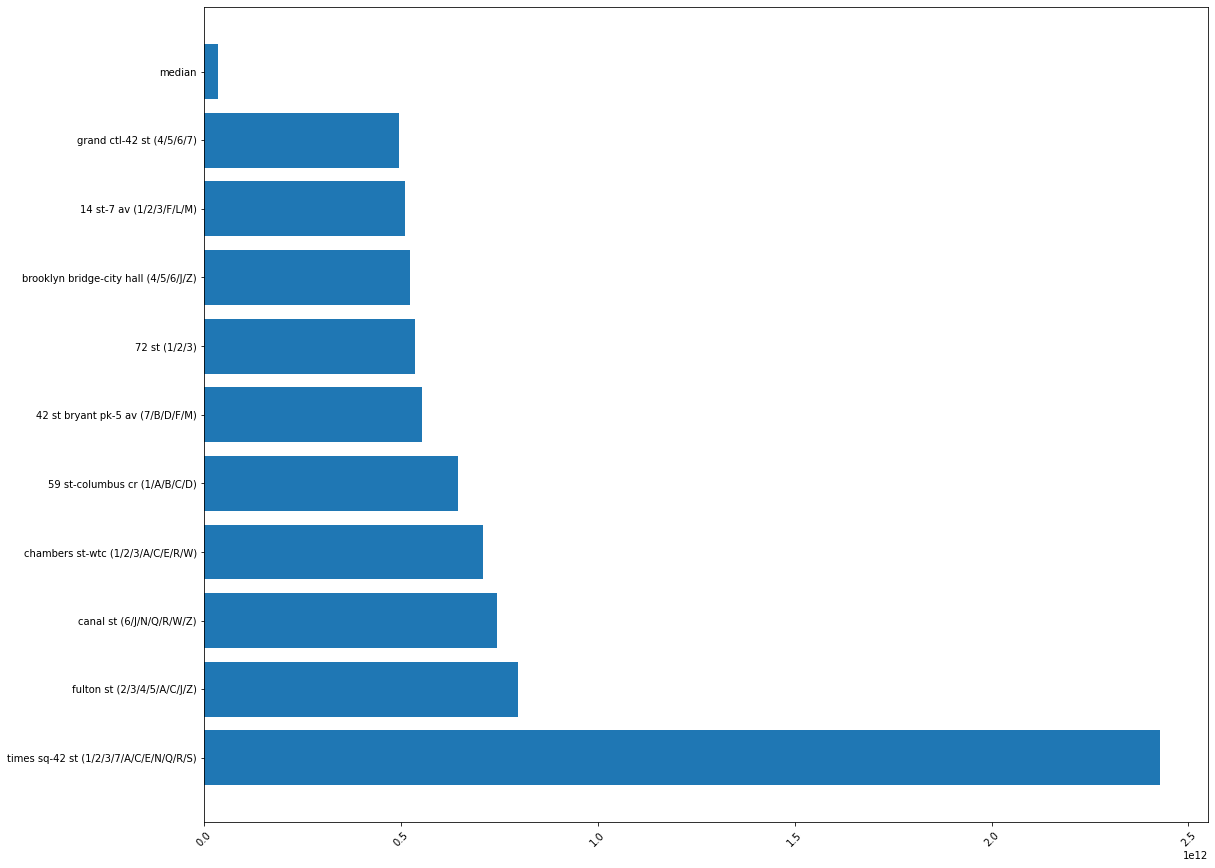

In [170]:
fig, ax = plt.subplots(figsize=(18, 15))

ax.barh(y = means.index,width=means.values)
;

<AxesSubplot:xlabel="['0', '500k', '1m', '1.5m', '2m', '2.5m']">

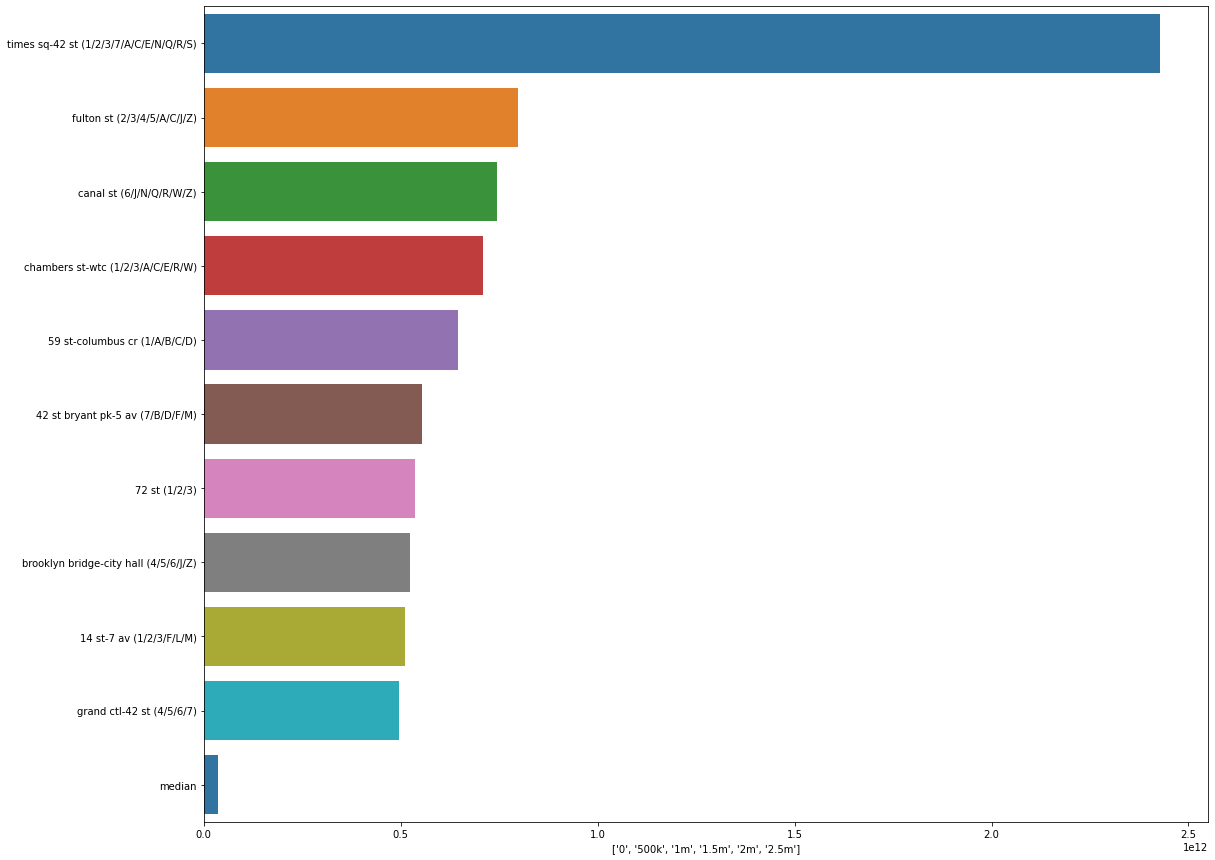

In [194]:
fig, ax = plt.subplots(figsize=(18, 15))
sns.barplot(y = means.index,x = means.values,palette='tab10',ax=ax)
ax.set_xlabel(['0','500k','1m','1.5m','2m','2.5m'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

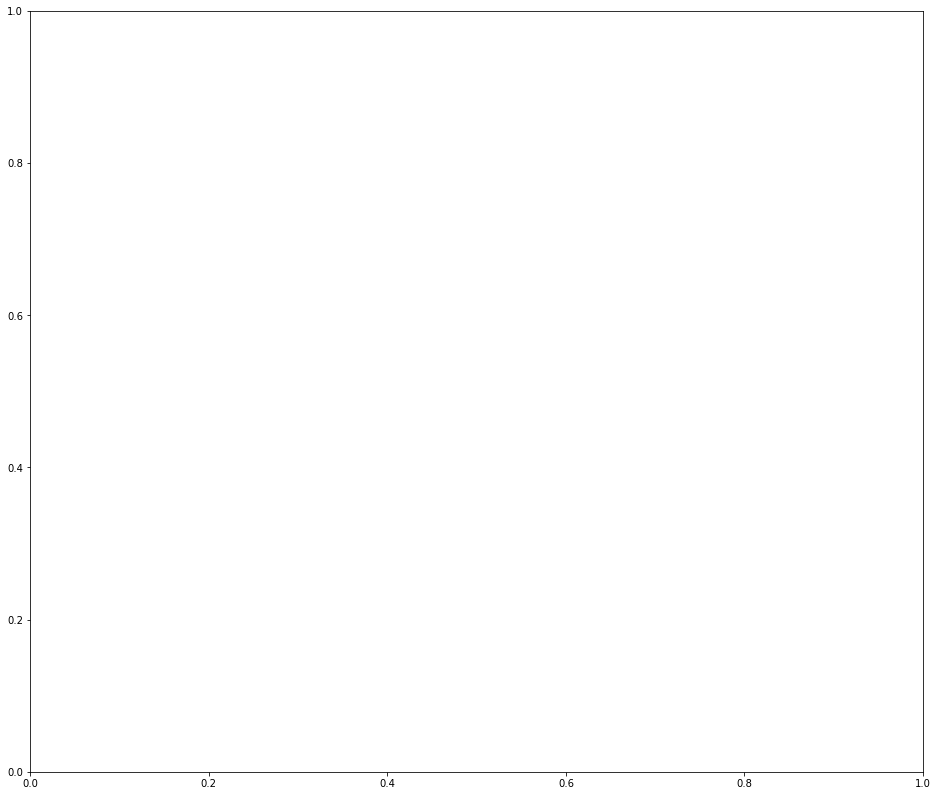

In [55]:
fig, ax = plt.subplots(figsize=(16,14))
sns.barplot(data=manh_ent)
ax.legend(fontsize='x-large')
ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('Per million',fontsize=20)
ax.set_title('Most entries in Manhattan',fontsize=20)
plt.show()